In [ ]:
!pip install deeplake

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 88.1 MB/s eta 0:00:00


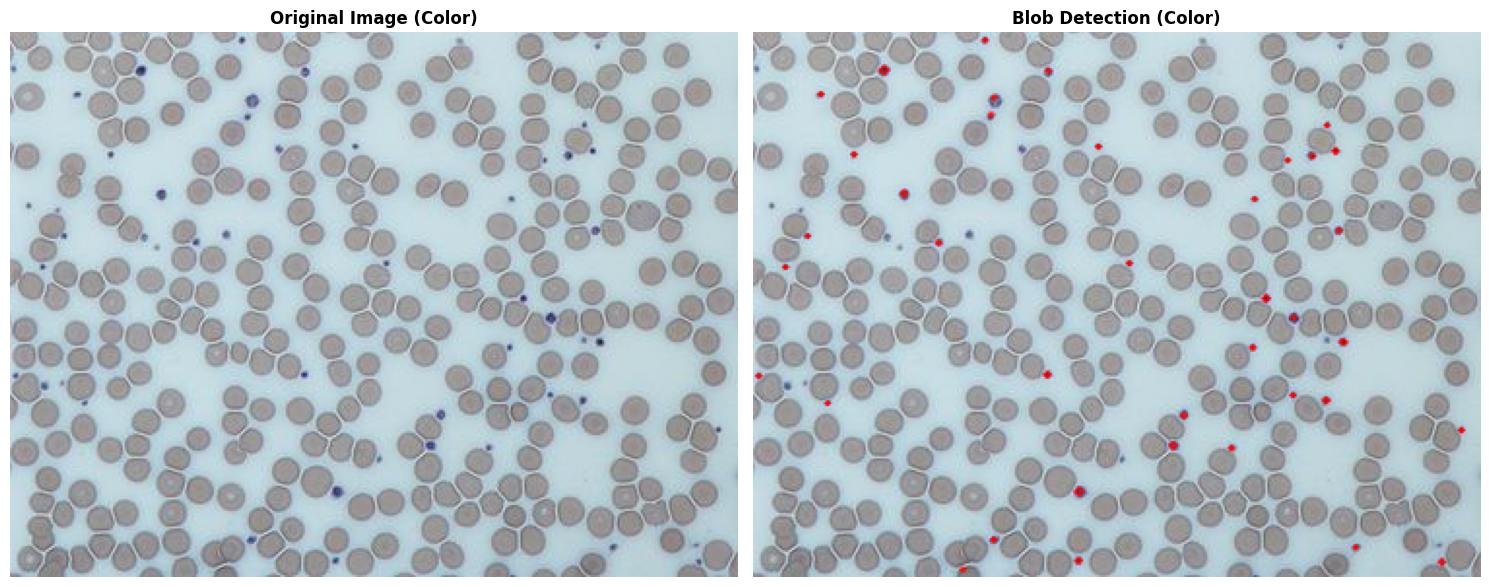

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in color
image_path = "/content/375px-Platelets2.jpeg"  # Replace with the actual image path
image = cv2.imread(image_path)  # Load in color (BGR format)

# Convert the image to grayscale for blob detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Configure the parameters for SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()

# Setting thresholds
params.minThreshold = 5
params.maxThreshold = 100

params.filterByArea = True
params.minArea = 2
params.maxArea = 50

params.filterByCircularity = True
params.minCircularity = 0.2
params.filterByConvexity = True
params.minConvexity = 0.5
params.filterByInertia = False

detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs in the image
keypoints = detector.detect(gray_image)

# Draw the detected blobs as red circles
blob_image = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255),
                               cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Function to visualize blobs
def plot_blobs(original_image, blob_image, title_original, title_blob):
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    axes[0].set_title(title_original, fontsize=12, fontweight='bold')
    axes[0].axis("off")

    axes[1].imshow(cv2.cvtColor(blob_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    axes[1].set_title(title_blob, fontsize=12, fontweight='bold')
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

plot_blobs(image, blob_image, "Original Image (Color)", "Blob Detection (Color)")

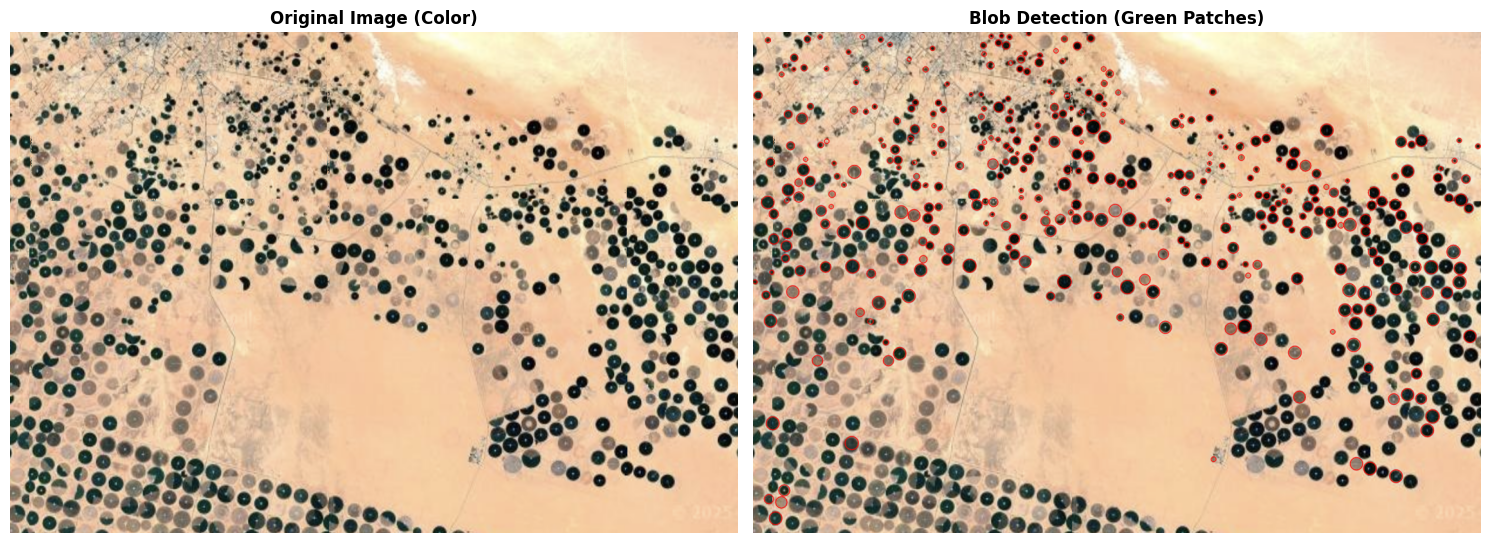

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in color
image_path = "/content/gw4UcdQI.png"  # Replace with the actual image path
image = cv2.imread(image_path)  # Load in color (BGR format)

# Convert the image to grayscale for blob detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Configure the parameters for SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()

# Setting thresholds
params.minThreshold = 30   # Suitable range for higher contrast areas
params.maxThreshold = 200

# Filter by Area (focus on larger blobs)
params.filterByArea = True
params.minArea = 25   # Large values for fields
params.maxArea = 350

# Filter by Circularity (focus on circular blobs)
params.filterByCircularity = True
params.minCircularity = 0.8  # High circularity for more perfect circles

# Disable other filters for broader detection
params.filterByConvexity = False
params.filterByInertia = False

# Create a blob detector with the adjusted parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs in the image
keypoints = detector.detect(gray_image)

# Draw the detected blobs as red circles
blob_image = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255),
                               cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Function to visualize blobs
def plot_blobs(original_image, blob_image, title_original, title_blob):
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    axes[0].set_title(title_original, fontsize=12, fontweight='bold')
    axes[0].axis("off")

    axes[1].imshow(cv2.cvtColor(blob_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    axes[1].set_title(title_blob, fontsize=12, fontweight='bold')
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

# Plot the original image and the image with blobs
plot_blobs(image, blob_image, "Original Image (Color)", "Blob Detection (Green Patches)")

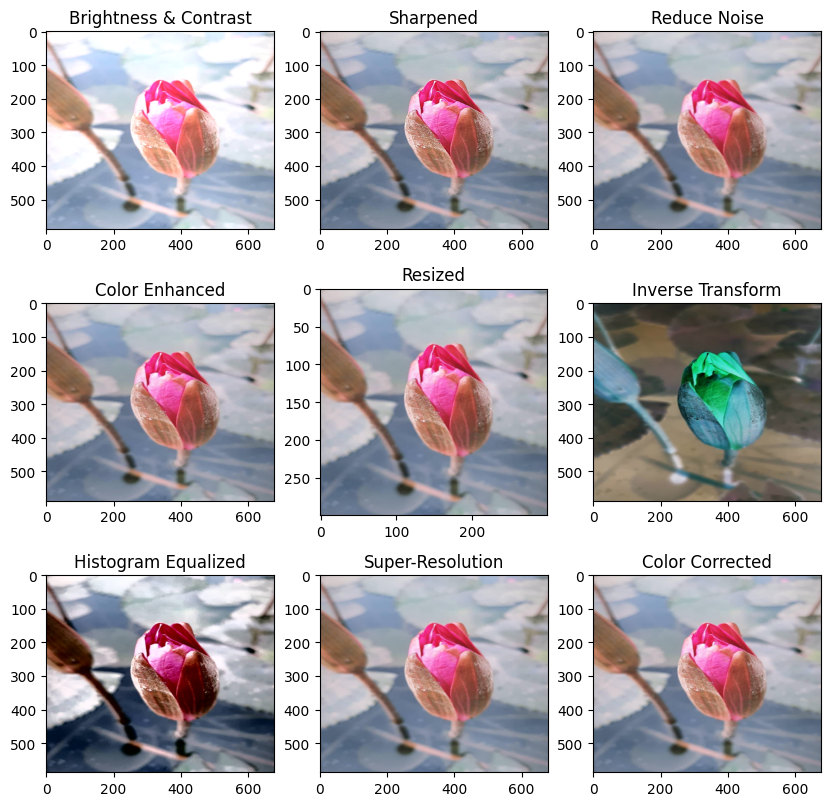

In [ ]:
import cv2
import numpy as np
from skimage.exposure import equalize_hist

filepath = "/content/Screenshot 2025-03-26 190811.png"
# Load Image
def load_image(filepath):
    with open(filepath, 'rb') as f:
        img = cv2.imdecode(np.frombuffer(f.read(), np.uint8), cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Image Enhancement Functions
def adjust_brightness_contrast(image, alpha=1.2, beta=20):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

def remove_noise(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def enhance_color(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def resize_image(image, width, height):
    return cv2.resize(image, (width, height))

def inverse_transform(image):
    return 255 - image

def histogram_equalization(image):
    img_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)


def super_resolution(image):
    upscaled = cv2.pyrUp(image)
    return cv2.pyrDown(upscaled)

def color_correction(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lower = np.array([0, 0, 0])
    upper = np.array([255, 255, 255])
    mask = cv2.inRange(hsv, lower, upper)
    return cv2.bitwise_and(image, image, mask=mask)

# Example Usage
if __name__ == "__main__":
    img_path = "Screenshot 2025-03-26 190811.png"  # Change accordingly
    image = load_image(img_path)

    bright_contrast = adjust_brightness_contrast(image)
    sharpened = sharpen_image(image)
    noise_removed = remove_noise(image)
    color_enhanced = enhance_color(image)
    resized = resize_image(image, 300, 300)
    inverse = inverse_transform(image)
    hist_eq = histogram_equalization(image)
    super_res = super_resolution(image)
    color_corrected = color_correction(image)

    # Display Results
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 3, 1), plt.imshow(bright_contrast), plt.title('Brightness & Contrast')
    plt.subplot(3, 3, 2), plt.imshow(sharpened), plt.title('Sharpened')
    plt.subplot(3, 3, 3), plt.imshow(noise_removed), plt.title('Reduce Noise')
    plt.subplot(3, 3, 4), plt.imshow(color_enhanced), plt.title('Color Enhanced')
    plt.subplot(3, 3, 5), plt.imshow(resized), plt.title('Resized')
    plt.subplot(3, 3, 6), plt.imshow(inverse, cmap='gray'), plt.title('Inverse Transform')
    plt.subplot(3, 3, 7), plt.imshow(hist_eq), plt.title('Histogram Equalized')
    plt.subplot(3, 3, 8), plt.imshow(super_res), plt.title('Super-Resolution')
    plt.subplot(3, 3, 9), plt.imshow(color_corrected), plt.title('Color Corrected')
    plt.show()



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import time
from torchvision.models import vgg16, alexnet
from torch.utils.data import DataLoader

# Step 1: Set up the device for computation (CPU/GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 2: Load CIFAR-100 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

# Step 3: Load Pretrained Models
def get_model(model_name):
    if model_name == "alexnet":
        model = alexnet(pretrained=True)
        model.classifier[6] = nn.Linear(4096, 100)
    elif model_name == "vgg16":
        model = vgg16(pretrained=True)
        model.classifier[6] = nn.Linear(4096, 100)
    model = model.to(device)
    return model

# Training Function
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

# Evaluation Function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    start_time = time.time()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    end_time = time.time()
    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%, Inference Time: {end_time - start_time:.2f}s")
    return accuracy, end_time - start_time

# Train and Evaluate AlexNet
alexnet_model = get_model("alexnet")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet_model.parameters(), lr=0.001)
train_model(alexnet_model, train_loader, criterion, optimizer, epochs=5)
alexnet_acc, alexnet_time = evaluate_model(alexnet_model, test_loader)

# Train and Evaluate VGG16
vgg16_model = get_model("vgg16")
optimizer = optim.Adam(vgg16_model.parameters(), lr=0.001)
train_model(vgg16_model, train_loader, criterion, optimizer, epochs=5)
vgg16_acc, vgg16_time = evaluate_model(vgg16_model, test_loader)

# Compare Results
print(f"AlexNet - Accuracy: {alexnet_acc:.2f}%, Time: {alexnet_time:.2f}s")
print(f"VGG16 - Accuracy: {vgg16_acc:.2f}%, Time: {vgg16_time:.2f}s")

Epoch 1, Loss: 4.6079
Epoch 2, Loss: 4.6066
Epoch 3, Loss: 4.6064
Epoch 4, Loss: 4.6062
Epoch 5, Loss: 4.6061
Accuracy: 1.00%, Inference Time: 18.07s
Epoch 1, Loss: 4.2898
Epoch 2, Loss: 3.7029
Epoch 3, Loss: 3.3686
Epoch 4, Loss: 3.1071
Epoch 5, Loss: 2.8620
Accuracy: 28.80%, Inference Time: 53.36s
AlexNet - Accuracy: 1.00%, Time: 18.07s
VGG16 - Accuracy: 28.80%, Time: 53.36s


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time
from torchvision import models

# Step 1: Installation of necessary libraries (Ensure you have torch and torchvision installed)

# Step 2: Load the dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to fit AlexNet and VGG16
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 64

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Step 3: Load the pretrained models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

alexnet = models.alexnet(pretrained=True)
alexnet.classifier[6] = nn.Linear(4096, 100)  # Adjust output layer for 100 classes
alexnet = alexnet.to(device)

vgg16 = models.vgg16(pretrained=True)
vgg16.classifier[6] = nn.Linear(4096, 100)
vgg16 = vgg16.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_alexnet = optim.Adam(alexnet.parameters(), lr=0.001)
optimizer_vgg16 = optim.Adam(vgg16.parameters(), lr=0.001)

# Training function
def train_model(model, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        start_time = time.time()
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        end_time = time.time()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}, Time: {end_time - start_time:.2f} sec")

# Step 4: Train the Models
print("Training AlexNet...")
train_model(alexnet, optimizer_alexnet)

print("Training VGG16...")
train_model(vgg16, optimizer_vgg16)

# Step 5: Evaluate the Performances
def evaluate_model(model):
    model.eval()
    correct, total = 0, 0
    total_loss = 0.0
    start_time = time.time()
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    end_time = time.time()
    accuracy = 100 * correct / total
    avg_loss = total_loss / len(testloader)
    inference_time = end_time - start_time
    return accuracy, avg_loss, inference_time

print("Evaluating AlexNet...")
acc_alexnet, loss_alexnet, time_alexnet = evaluate_model(alexnet)
print(f"AlexNet -> Accuracy: {acc_alexnet:.2f}%, Loss: {loss_alexnet:.4f}, Inference Time: {time_alexnet:.2f} sec")

print("Evaluating VGG16...")
acc_vgg16, loss_vgg16, time_vgg16 = evaluate_model(vgg16)
print(f"VGG16 -> Accuracy: {acc_vgg16:.2f}%, Loss: {loss_vgg16:.4f}, Inference Time: {time_vgg16:.2f} sec")

# Step 6: Compare the results
print("\nComparison Results:")
print(f"AlexNet -> Accuracy: {acc_alexnet:.2f}%, Loss: {loss_alexnet:.4f}, Inference Time: {time_alexnet:.2f} sec")
print(f"VGG16 -> Accuracy: {acc_vgg16:.2f}%, Loss: {loss_vgg16:.4f}, Inference Time: {time_vgg16:.2f} sec")


100%|██████████| 169M/169M [00:13<00:00, 13.0MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 120MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'we

Training AlexNet...
Epoch 1, Loss: 4.608321049024382, Time: 95.17 sec
Epoch 2, Loss: 4.6066558964721995, Time: 93.75 sec
Epoch 3, Loss: 4.60635186400255, Time: 94.12 sec
Epoch 4, Loss: 4.606234060833826, Time: 96.06 sec
Epoch 5, Loss: 4.606160447420671, Time: 94.58 sec
Training VGG16...
Epoch 1, Loss: 4.613179971494943, Time: 669.22 sec
Epoch 2, Loss: 4.607534819551746, Time: 665.97 sec
Epoch 3, Loss: 4.607787456658795, Time: 666.04 sec
Epoch 4, Loss: 4.607029666681119, Time: 666.14 sec
Epoch 5, Loss: 4.606705302777498, Time: 665.96 sec
Evaluating AlexNet...
AlexNet -> Accuracy: 1.00%, Loss: 4.6053, Inference Time: 17.91 sec
Evaluating VGG16...
VGG16 -> Accuracy: 1.00%, Loss: 4.6055, Inference Time: 50.99 sec

Comparison Results:
AlexNet -> Accuracy: 1.00%, Loss: 4.6053, Inference Time: 17.91 sec
VGG16 -> Accuracy: 1.00%, Loss: 4.6055, Inference Time: 50.99 sec
